# Homework Problem Set 4

Done by Adam Ilyas 1002010

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.misc import comb

## Question 1. 

Refer to the spreadsheet for the corneal thickness data of glaucoma patients

In [2]:
data = pd.read_excel("stats2018_PS4.xlsx")
data

,Person,Glaucoma,No Glaucoma
0,1,488,484
1,2,478,478
2,3,480,492
3,4,426,444
4,5,440,436
5,6,410,398
6,7,458,464
7,8,460,476


**(a) Do the sign test to determine if the corneal thickness differs between an eye affected with
glaucoma and an unaffected eye. Use α = 0.05.**

$h_0: m = 0$

$h_A: m \ne 0$

In [3]:
data["difference"] = data["Glaucoma"] - data["No Glaucoma"]
data

,Person,Glaucoma,No Glaucoma,difference
0,1,488,484,4
1,2,478,478,0
2,3,480,492,-12
3,4,426,444,-18
4,5,440,436,4
5,6,410,398,12
6,7,458,464,-6
7,8,460,476,-16


In [4]:
s_plus = len([i for i in data["difference"] if i>0])
s_minus = len([i for i in data["difference"] if i<0])
print("s_plus: {}\ns_minus: {}".format(s_plus,s_minus))

s_plus: 3
s_minus: 4


In [5]:
n = s_plus + s_minus # 7
alpha = 0.05
# probability of getting 3 or fewer s plus
p_plus = sum([comb(n, k)*0.5**n for k in range(0, s_plus+1)]) # sum for case 0, 1, 2, 3

def test_hypo(p_value, alpha, h_0):
    if p_value > alpha:
        print("Since p_value ({}) > alpha ({}),\nWe have insufficient evidence to reject the hypothesis that {}"
              .format(p_value, alpha,h_0))
    elif p_value <= alpha:
        print("Since p_value ({}) < alpha ({}),\nWe have insufficient evidence to accept the hypothesis that {}"
              .format(p_value, alpha,h_0))
        
test_hypo(p_plus, alpha, "corneal thickness differs")

Since p_value (0.5) > alpha (0.05),
We have insufficient evidence to reject the hypothesis that corneal thickness differs


In [6]:
# or you can use s_minus as show here
# probability of getting 4 or more s_minus (4,5,6,7)
p_minus = sum([comb(n, k)*0.5**n for k in range(s_minus, n+1)]) # sum for case 4, 5, 6, 7

test_hypo(p_minus, alpha, "corneal thickness differs")

Since p_value (0.5) > alpha (0.05),
We have insufficient evidence to reject the hypothesis that corneal thickness differs


**(b) Repeat part (a) using the Wilcoxon signed rank test. Do the two tests always give the same
result when applied to the same data?**

In [7]:
data["absolute"] = abs(data["difference"])
data

,Person,Glaucoma,No Glaucoma,difference,absolute
0,1,488,484,4,4
1,2,478,478,0,0
2,3,480,492,-12,12
3,4,426,444,-18,18
4,5,440,436,4,4
5,6,410,398,12,12
6,7,458,464,-6,6
7,8,460,476,-16,16


In [8]:
data["rank"] = data["absolute"].rank()
data

,Person,Glaucoma,No Glaucoma,difference,absolute,rank
0,1,488,484,4,4,2.5
1,2,478,478,0,0,1.0
2,3,480,492,-12,12,5.5
3,4,426,444,-18,18,8.0
4,5,440,436,4,4,2.5
5,6,410,398,12,12,5.5
6,7,458,464,-6,6,4.0
7,8,460,476,-16,16,7.0


In [13]:
w_plus = sum([data["rank"].iloc[index] for index in data.index if data["difference"].iloc[index] > 0])
w_plus

w_minus = sum([data["rank"].iloc[index] for index in data.index if data["difference"].iloc[index] < 0])
w_minus

print("W+: {}\nW-: {}".format(w_plus, w_minus))

W+: 10.5
W-: 24.5


In [15]:
# w_plus follows approx a normal distribution with miu and sigma
N = len(data.index)
miu = N*(N+1)/4
sigma = ( N*(N+1)*(2*N+1)/24 )**0.5
test_statistic_minus = ( w_minus - miu ) / sigma
print("miu: {}\nsigma: {}\ntest-statistic: {}".format(miu,sigma, test_statistic_minus))

p_value = 1 - stats.norm.cdf(test_statistic_minus)

test_hypo(p_value, alpha, "corneal thickness differs")

miu: 18.0
sigma: 7.14142842854285
test-statistic: 0.9101820546182063
Since p_value (0.1813632532425491) > alpha (0.05),
We have insufficient evidence to reject the hypothesis that corneal thickness differs


In [16]:
# w_minus follows approx a normal distribution with miu and sigma
N = len(data.index)
miu = N*(N+1)/4
sigma = ( N*(N+1)*(2*N+1)/24 )**0.5
test_statistic = ( w_plus - miu ) / sigma
print("miu: {}\nsigma: {}\ntest-statistic: {}".format(miu,sigma, test_statistic))

p_value = stats.norm.cdf(test_statistic)

test_hypo(p_value, alpha, "corneal thickness differs")

miu: 18.0
sigma: 7.14142842854285
test-statistic: -1.0502100630210074
Since p_value (0.1468107719644529) > alpha (0.05),
We have insufficient evidence to reject the hypothesis that corneal thickness differs


No both test will not always give the same value. For Wilcoxon Signed Rank test, additional assumption of mean == median is made. Thus, it depends on whether the population is symmetric.

## Question 2. 

**In ANOVA for single factor experiments, define MST = SST/(N −1). Is it possible that MST = MSA + MSE? Fully justify your answer.**

We know that Mean Square Total $$MST = \frac{SST}{N-1}$$

And we know that Mean Square Error $$MSE = \frac{SSE}{N-k}$$

If MST = MSA + MSE, then we would have:

$$\frac{SST}{N-1} = \frac{SSA}{k-1} + \frac{SSE}{N-k} =
\frac{SSA+SSE}{(k-1) - (N -k)}$$

multiply both sides by $(k-1)-(N-K)$ (which is ) 
we get:

$$SSA + \frac{SSA \times (N-k)}{k-1} + SSE + \frac{SSE \times (k-1)}{N-k} = SSA + SSE$$

$$\frac{SSA \times (N-k)}{k-1} + \frac{SSE \times (k-1)}{N-k} = 0$$

Therefore it is not possible for MST = MSA + MSE

### Question 3. 

**Water salinity measurements at three sites are given in the spreadsheet, and an
ANOVA table is produced. However, one entry (marked by X) has been accidentally deleted.**


In [ ]:
# from excel
site1 = [37.54, 37.01, 36.71, 37.03, 37.32, 37.01, 37.03, 37.7, 37.36, 36.75, 37.45] # with an additional entry X
site2 = [40.17, 40.8, 39.76, 39.7, 40.79, 40.44, 39.79, 39.38]
site3 = [39.04, 39.21, 39.05, 38.24, 38.53, 38.71, 38.89, 38.66, 38.51, 40.08]

From excel: P-value (4.00865E-11) <<<< F-crit (3.354130829). Thus there is sufficient evidence to reject the null hypothesis that mean salinity of water of the three sites are the same.

**(b) Find X with help from the ANOVA table. (Hint: you can do this using any method you like,
but check your answer.)**


![title](./assets/q3 salinity.PNG)

### Question 4. 

**Refer to the sugar content example given in the spreadsheet. Use the Bonferroni
method to determine which shelves have significantly different mean sugar content. Use
α = 0.05.**

In [44]:
sugar = pd.read_excel("stats2018_PS4.xlsx", sheetname=2, skiprows=1)
sugar = sugar.set_index("Unnamed: 0")
sugar

,Shelf 1,Shelf 2,Shelf 3
Unnamed: 0,,,
n,20.000,20.000,20.000
mean,4.800,9.850,6.100
sd,2.138,1.985,1.865


In [56]:
SSE = sum([(sugar[i]["n"]-1)*sugar[i]["sd"]**2 for i in sugar.columns])
MSE = SSE/ (sum([sugar[i]["n"] for i in sugar.columns]) - 3 )
print("SSE: {}\nMSE: {}".format(SSE, MSE))

SSE: 227.800386
MSE: 3.996498


$$SSE = \sum_{i=1}^{3} (n_i-1) \times s_i^2$$

$$MSE = \frac{SSE}{N-K}$$
where N: total size, K: Number of predictors (3)

In [59]:
def bonferroni_confidence_interval(alpha, k, N, MSE, n1, n2, mean1, mean2):
    m = comb(k,2)
    LHS = abs(mean1 - mean2)
    RHS = stats.t.ppf(1-alpha/(2*m), df=N-k) * MSE**0.5 * (1/n1+1/n2)**0.5
    if LHS > RHS:
        print("LHS: {} RHS: {} (REJECT)".format(LHS, RHS))
    else:
        print("LHS: {} RHS: {}".format(LHS,RHS))

#test function        
bonferroni_confidence_interval(alpha=0.05, k=3, N=60, MSE=MSE, n1=20, n2=20,
                               mean1=sugar["Shelf 1"]["mean"], mean2=sugar["Shelf 2"]["mean"])

LHS: 5.05 RHS: 1.5593867622836817 (REJECT)


In [64]:
m = comb(3,2) # m = k choose 2 where k => number of predictors (3)


for i in sugar.columns:
    for j in sugar.columns:
        if i == j:
            continue
        else:
            # perform pairwise
            print()
            print(i, j)
            bonferroni_confidence_interval(alpha=0.05, k=3, N=60, MSE=MSE, n1=20, n2=20,
                               mean1=sugar[i]["mean"], mean2=sugar[j]["mean"])


Shelf 1 Shelf 2
LHS: 5.05 RHS: 1.5593867622836817 (REJECT)

Shelf 1 Shelf 3
LHS: 1.2999999999999998 RHS: 1.5593867622836817

Shelf 2 Shelf 1
LHS: 5.05 RHS: 1.5593867622836817 (REJECT)

Shelf 2 Shelf 3
LHS: 3.75 RHS: 1.5593867622836817 (REJECT)

Shelf 3 Shelf 1
LHS: 1.2999999999999998 RHS: 1.5593867622836817

Shelf 3 Shelf 2
LHS: 3.75 RHS: 1.5593867622836817 (REJECT)


### Question 5. 

**Refer to the spreadsheet ‘IQ’, which records some adopted children’s IQ with the
socioeconomic status of their biological parents as well as adoptive parents.**


**(a) Sketch a line chart for the cell means, and from it comment on whether there is any significant
interaction.**

![title](./assets/q5 ses.PNG)

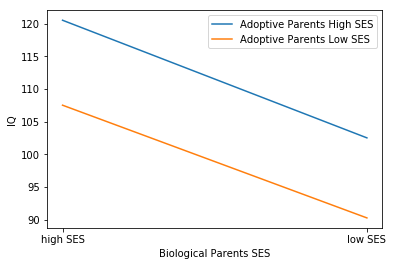

In [79]:
adoptive_high = [120.5,102.5]
adoptive_low = [107.5,90.25]

plt.plot(adoptive_high, label="Adoptive Parents High SES")
plt.plot(adoptive_low, label = "Adoptive Parents Low SES")
plt.xlabel("Biological Parents SES")
plt.ylabel("IQ")
plt.legend()
plt.xticks([0,1],["high SES","low SES"])
plt.show()

Since lines do not cross, there are no interaction

**(b) Construct an ANOVA table for this two-factor experiment. What conclusions can you draw
from it?**


![title](./assets/q5 anova.PNG)

As the first 2 F statistic are higher than the critical value hence, there is not enough evidence to reject the null hypothesis that:

1) The means of biological high ses and low ses are the same

2) The means of adopted high ses and low ses are the same

However, there is enough evidence to reject hypothesis that:

3) No interaction between adopted and biological.

In conclusion, the affluence of your family (SES) has some correlation with the IQ and

However, whether you are adopted or not should not have great influence on your IQ

### Question 6. 

**Suppose x is the number of iid Bernoulli trials with success probability p required
to achieve the first success. <br>Show that the MLE of p equals pˆ = 1/x**

p(success on 1st try) = $p$

p(success on 2nd try) = $(1-p)p$

p(success on 3rd try) = $(1-p)^2p$

p(success on $x^{th}$ try) = $(1-p)^{x-1}p$

Thus, the max likelihood function is defined as:

$$L(p) = (1-p)^{x-1}p$$

$$\ln{L(p)} = (x-1)\ln{(1-p)}+\ln{p}$$

$$\frac{d}{dp} \ln{L(p)} = (x-1) \frac{-1}{1-p} + \frac{1}{p}$$

To find the minimum, we equate $\frac{d}{dp}$  to 0

$$(x-1) \frac{-1}{1-p} + \frac{1}{p} = 0$$

$$\frac{1}{p} = \frac{x-1}{1-p}$$

$$1-p = (x-1)p$$

$$p = \frac{1}{x}$$                    

### Question 7. 

**Show that the gamma distribution is a conjugate prior for the Poisson distribution.
In particular, suppose that $x_1,...,x_n$ is a random sample from a Poisson distribution**

$$f(x|\theta)=\frac{e^{-\theta}\theta^x}{x!}, \forall \text{ } x = 0,1,2,...$$

**and the prior on $\theta$ is Gamma$(\alpha,\beta)$ distribution**

$$\pi(\theta)=\frac{1}{\Gamma(\alpha)}\beta^{\alpha}\theta^{\alpha-1}e^{-\beta\theta}$$

**(a) Show that the posterior distribution of $\theta$ is Gamma($\alpha+\sum_ix_i, \beta+n$)**

$$P(\theta | x) \propto P(x | \theta) P(\theta)$$

$$P(\theta | x) = \prod_{i=0}^n(\frac{e^{-\theta}}{x_i!})\frac{1}{\Gamma{\alpha}}\beta^{\alpha}\theta^{\alpha-1}e^{-\beta\theta}$$

$$P(\theta | x) \propto (\theta^{\alpha-1}e^{-\beta\theta})\prod_{i=1}^n(e^{-\theta}\theta^{x_i})$$

$$P(\theta | x) = e^{-n\theta}\theta\sum_ix_i(\theta^{\alpha-1})(e^{-\beta\theta})$$

$$P(\theta | x) = e^{-(\beta+n)(\theta)}\theta(\alpha-1)+\sum_ix_i$$

$$P(\theta | x) \propto (\beta + n)^{\alpha + \sum_ix_i} (e^{-(\beta+n)\theta})(\theta^{(\alpha-1)+{\sum_ix_i}})$$

$$= Gamma(\alpha + \sum_{i=0}{n},\text{ }\beta+n)$$

**(b) Interpret how the posterior mean of $\theta$**

$$E(\theta|x_1,...,x_n) = \frac{\alpha + \sum_ix_i}{\beta+n} $$

**depends on n. What happens to this estimate as $n\rightarrow\infty$?**


as $n\rightarrow\infty$

the mean $\rightarrow \frac{\sum_ix_i}{n} = \bar{x}$

Thus, it shows that the expected mean of the Poisson Distribution = sample mean as n tends to infinity